## Exercise 7: Convolutional networks

### Description

Convolutional neural networks have an inductive bias that is well adapted to image classification.

1. Design a convolutional neural network, play with the parameters and fit it. Hint: You may get valuable inspiration from the keras [examples](https://github.com/keras-team/keras/tree/master/examples), e.g. [mnist_cnn](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py).
2. Plot the learning curves of the convolutional neural network together with the so far best performing model.

## Solution

### 1. Design a convolutional neural network, play with the parameters and fit it.

In [248]:
from keras import backend as K

In [249]:
img_rows = img_cols = 16
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**a. First model**

In [284]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [285]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 40166 samples, validate on 14629 samples
Epoch 1/30
40166/40166 [==============================] - 42s 1ms/step - loss: 1.0395 - acc: 0.5943 - val_loss: 0.4635 - val_acc: 0.8620
Epoch 2/30
40166/40166 [==============================] - 35s 878us/step - loss: 0.4452 - acc: 0.8596 - val_loss: 0.3030 - val_acc: 0.9159
Epoch 3/30
40166/40166 [==============================] - 40s 1ms/step - loss: 0.3587 - acc: 0.8880 - val_loss: 0.2693 - val_acc: 0.9223
Epoch 4/30
40166/40166 [==============================] - 38s 945us/step - loss: 0.3189 - acc: 0.8987 - val_loss: 0.2557 - val_acc: 0.9265
Epoch 5/30
40166/40166 [==============================] - 35s 863us/step - loss: 0.2981 - acc: 0.9074 - val_loss: 0.2393 - val_acc: 0.9284
Epoch 6/30
40166/40166 [==============================] - 31s 760us/step - loss: 0.2810 - acc: 0.9092 - val_loss: 0.2373 - val_acc: 0.9291
Epoch 7/30
40166/40166 [==============================] - 30s 746us/step - loss: 0.2703 - acc: 0.9137 - val_loss: 0.2334

In [286]:
print("Accuracy = {}%".format(round(100 * score[1], 4)))

Accuracy = 94.5382%


**b. Second model**

In [254]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(5, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=2)
score2 = model2.evaluate(x_test, y_test, verbose=0)

Train on 40166 samples, validate on 14629 samples
Epoch 1/30
 - 14s - loss: 1.0055 - acc: 0.6393 - val_loss: 0.5627 - val_acc: 0.8461
Epoch 2/30
 - 7s - loss: 0.5360 - acc: 0.8457 - val_loss: 0.4355 - val_acc: 0.8707
Epoch 3/30
 - 7s - loss: 0.4433 - acc: 0.8736 - val_loss: 0.3850 - val_acc: 0.8882
Epoch 4/30
 - 7s - loss: 0.4007 - acc: 0.8832 - val_loss: 0.3504 - val_acc: 0.9031
Epoch 5/30
 - 7s - loss: 0.3652 - acc: 0.8918 - val_loss: 0.3277 - val_acc: 0.9088
Epoch 6/30
 - 7s - loss: 0.3367 - acc: 0.8985 - val_loss: 0.3089 - val_acc: 0.9150
Epoch 7/30
 - 7s - loss: 0.3157 - acc: 0.9042 - val_loss: 0.2966 - val_acc: 0.9133
Epoch 8/30
 - 7s - loss: 0.2992 - acc: 0.9066 - val_loss: 0.2881 - val_acc: 0.9182
Epoch 9/30
 - 7s - loss: 0.2863 - acc: 0.9125 - val_loss: 0.2762 - val_acc: 0.9200
Epoch 10/30
 - 8s - loss: 0.2729 - acc: 0.9146 - val_loss: 0.2718 - val_acc: 0.9211
Epoch 11/30
 - 7s - loss: 0.2619 - acc: 0.9167 - val_loss: 0.2673 - val_acc: 0.9209
Epoch 12/30
 - 7s - loss: 0.2504 -

In [256]:
print("Accuracy = {}%".format(round(100 * score2[1], 4)))

Accuracy = 92.8635%


**c. Third model**

In [273]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=input_shape))
model3.add(Activation('relu'))
BatchNormalization(axis=-1)
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model3.add(Conv2D(64,(3, 3)))
model3.add(Activation('relu'))
BatchNormalization(axis=-1)
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

# Now we return to a fully connected layer
BatchNormalization()
model3.add(Dense(256))
model3.add(Activation('relu'))
BatchNormalization()
model3.add(Dropout(0.2))
model3.add(Dense(5))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=1)

Train on 40166 samples, validate on 14629 samples
Epoch 1/10
40166/40166 [==============================] - 36s 898us/step - loss: 0.8881 - acc: 0.6581 - val_loss: 0.4135 - val_acc: 0.8736
Epoch 2/10
40166/40166 [==============================] - 29s 722us/step - loss: 0.3508 - acc: 0.8858 - val_loss: 0.3147 - val_acc: 0.8955
Epoch 3/10
40166/40166 [==============================] - 25s 630us/step - loss: 0.2639 - acc: 0.9152 - val_loss: 0.2423 - val_acc: 0.9269
Epoch 4/10
40166/40166 [==============================] - 27s 663us/step - loss: 0.2201 - acc: 0.9307 - val_loss: 0.2250 - val_acc: 0.9332
Epoch 5/10
40166/40166 [==============================] - 30s 753us/step - loss: 0.1889 - acc: 0.9406 - val_loss: 0.2026 - val_acc: 0.9408
Epoch 6/10
40166/40166 [==============================] - 29s 729us/step - loss: 0.1687 - acc: 0.9474 - val_loss: 0.2178 - val_acc: 0.9318
Epoch 7/10
40166/40166 [==============================] - 26s 642us/step - loss: 0.1503 - acc: 0.9541 - val_loss: 0.

In [281]:
score3 = model3.evaluate(x_test, y_test, verbose=0) 
print("Accuracy = {}%".format(round(100 * score3[1], 6)))

Accuracy = 94.798004%


### 2. Plot the learning curves of the convolutional neural network together with the so far best performing model.

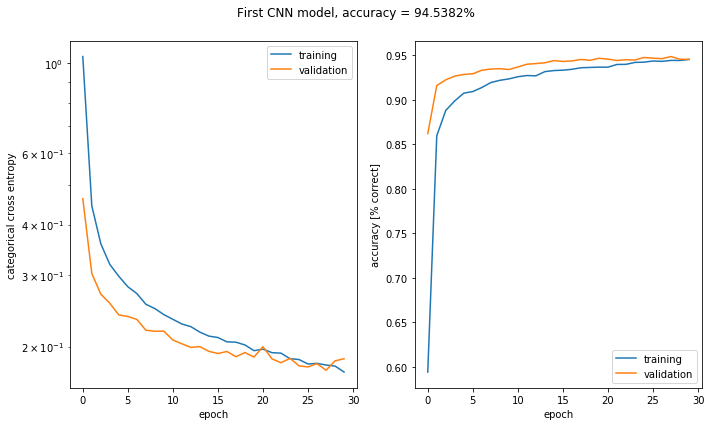

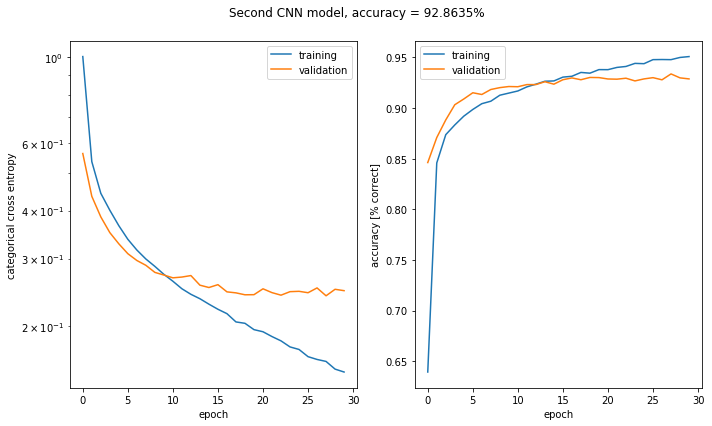

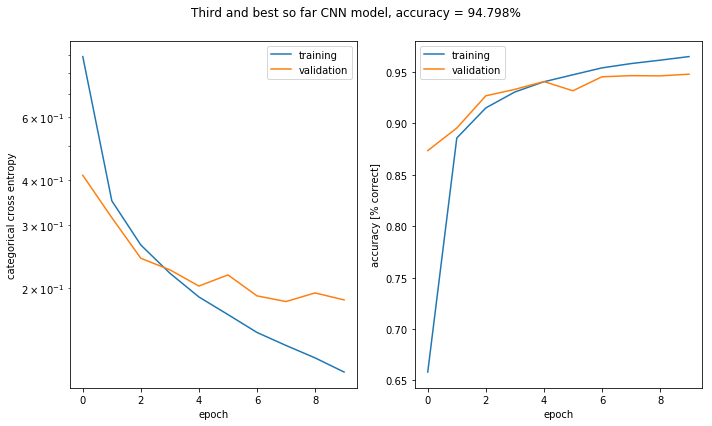

In [287]:
for (h, s, l) in zip([history, history2, history3], [score[1], score2[1], score3[1]], ['First', 'Second', 'Third and best so far']):
    plot_history(h, "{} CNN model, accuracy = {}%".format(l, round(100 * s, 4)))